[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\madhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 :
Cluster 1 :
Cluster 2 :
Cluster 3 :
Cluster 4 :


------------------------Cluster, Priority-----------------------


c:\Users\madhu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


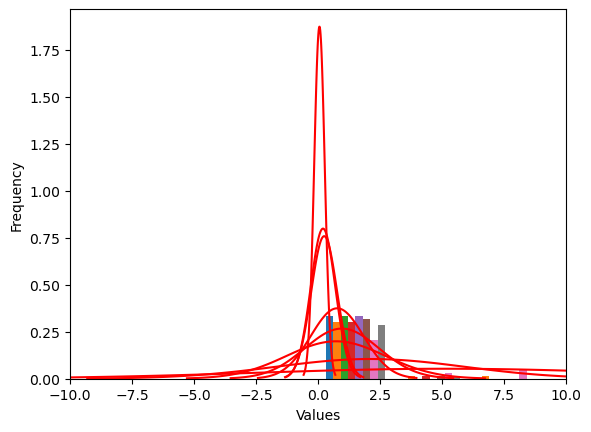

Chi-squared statistic: 184.10538759711108
P-value: 0.007348391459538219
Degree of freedom: 140
expected: [[7.04225352e-02 2.81690141e-01 1.40845070e-02 2.11267606e-01
  5.63380282e-02 2.25352113e-01 1.52112676e+00 6.19718310e-01]
 [2.34741784e-02 9.38967136e-02 4.69483568e-03 7.04225352e-02
  1.87793427e-02 7.51173709e-02 5.07042254e-01 2.06572770e-01]
 [2.34741784e-01 9.38967136e-01 4.69483568e-02 7.04225352e-01
  1.87793427e-01 7.51173709e-01 5.07042254e+00 2.06572770e+00]
 [2.58215962e-01 1.03286385e+00 5.16431925e-02 7.74647887e-01
  2.06572770e-01 8.26291080e-01 5.57746479e+00 2.27230047e+00]
 [4.69483568e-02 1.87793427e-01 9.38967136e-03 1.40845070e-01
  3.75586854e-02 1.50234742e-01 1.01408451e+00 4.13145540e-01]
 [4.69483568e-02 1.87793427e-01 9.38967136e-03 1.40845070e-01
  3.75586854e-02 1.50234742e-01 1.01408451e+00 4.13145540e-01]
 [9.38967136e-02 3.75586854e-01 1.87793427e-02 2.81690141e-01
  7.51173709e-02 3.00469484e-01 2.02816901e+00 8.26291080e-01]
 [9.38967136e-01 3.7

c:\Users\madhu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


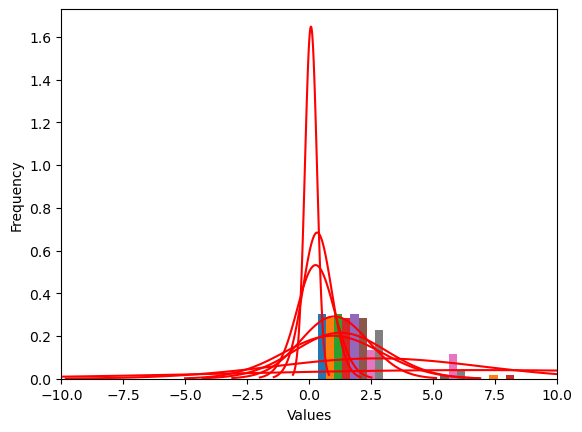

Chi-squared statistic: 159.30668546292628
P-value: 0.0005007404868655351
Degree of freedom: 105
expected: [[3.99061033e-01 1.59624413e+00 7.98122066e-02 1.19718310e+00
  3.19248826e-01 1.27699531e+00 8.61971831e+00 3.51173709e+00]
 [1.17370892e-01 4.69483568e-01 2.34741784e-02 3.52112676e-01
  9.38967136e-02 3.75586854e-01 2.53521127e+00 1.03286385e+00]
 [4.69483568e-02 1.87793427e-01 9.38967136e-03 1.40845070e-01
  3.75586854e-02 1.50234742e-01 1.01408451e+00 4.13145540e-01]
 [7.04225352e-02 2.81690141e-01 1.40845070e-02 2.11267606e-01
  5.63380282e-02 2.25352113e-01 1.52112676e+00 6.19718310e-01]
 [1.52582160e+00 6.10328638e+00 3.05164319e-01 4.57746479e+00
  1.22065728e+00 4.88262911e+00 3.29577465e+01 1.34272300e+01]
 [1.24413146e+00 4.97652582e+00 2.48826291e-01 3.73239437e+00
  9.95305164e-01 3.98122066e+00 2.68732394e+01 1.09483568e+01]
 [2.58215962e-01 1.03286385e+00 5.16431925e-02 7.74647887e-01
  2.06572770e-01 8.26291080e-01 5.57746479e+00 2.27230047e+00]
 [2.34741784e-02 9.

In [3]:
from scipy.stats import chi2_contingency# Import libraries
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
data = pd.read_csv('..\Dataset\Apache.csv')

# Filter the DataFrame to only include rows with certain status, task_type, and time_spent values
data = data.query('task_type == "Improvement" | task_type == "Task" | task_type == "New Feature" | task_type == "Epic"| task_type == "Bug"')
data = data.query('project_name == "Spark"')
data = data.query('time_spent >= 1 & time_spent <= 180')

# Reset the index of your DataFrame
data = data.reset_index(drop=True)


# Preprocess the text
stop_words = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.SnowballStemmer('english')

def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub('[^A-Za-z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

data['task_title'] = data['task_title'].apply(preprocess_text)

# Vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['task_title'])

# Cluster the task descriptions
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the task descriptions
cluster_labels = kmeans.labels_

# Find the most representative task descriptions for each cluster
cluster_centers = kmeans.cluster_centers_
distances = cosine_similarity(X, cluster_centers)
most_representative = np.argmax(distances, axis=0)

data['cluster'] = cluster_labels
data['cluster_description'] = ''

# Print the cluster labels and the most representative task descriptions for each cluster
for i in range(n_clusters):
    print('Cluster', i, ':')
    cluster_indices = np.where(cluster_labels == i)[0]
    representative_index = most_representative[i]
    cluster_description = data['task_title'][representative_index]
    data.loc[cluster_indices, 'cluster_description'] = cluster_description

    #print('Most representative task description:', data['task_title'][representative_index])
    #print('Number of task descriptions in cluster:', len(cluster_indices))
    #print('Task descriptions in cluster:', data['task_title'][cluster_indices])
    #print('\n')

# Reset the index of your DataFrame
data = data.reset_index(drop=True)



# Get the distinct values in the time_spent column
time_spent_values = data['time_spent'].unique()

# Create bins based on the quantiles of the time_spent column
bins = pd.qcut(time_spent_values, q=8, precision=0, retbins=True)[1]

# Create labels for the bins
labels = ['<{}'.format(bins[1]), '{}-{}'.format(bins[1], bins[2]), '{}-{}'.format(bins[2], bins[3]),
          '{}-{}'.format(bins[3], bins[4]), '{}-{}'.format(bins[4], bins[5]), '{}-{}'.format(bins[5], bins[6]),'{}-{}'.format(bins[6], bins[7]),'>{}'.format(bins[7])]

# Create a new categorical variable for time_spent
data['time_spent_category'] = pd.cut(data['time_spent'], bins=bins, labels=labels)

print('\n')
print('------------------------Cluster, Priority-----------------------')

# Create contingency table for cluster and priority
contingency_table_priority = pd.crosstab([data['cluster'], data['priority']], data['time_spent_category'])

# Calculate chi-squared statistic and p-value
chi2, p, dof, expected = chi2_contingency(contingency_table_priority)

# Get the mean and standard deviation of the data
data_mean = np.mean(contingency_table_priority)
data_std = np.std(contingency_table_priority)

# Create a range of x-values
x_values = np.linspace(data_mean - 3*data_std, data_mean + 3*data_std, 100)

# Create a normal distribution with the mean and standard deviation of the data
norm_distribution = norm(data_mean, data_std)

# Plot the histogram of the data
plt.xlim(-10, 10)
plt.hist(contingency_table_priority, bins=10, density=True)

# Plot the bell curve
plt.plot(x_values, norm_distribution.pdf(x_values), color='red')

# Set the axis labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

print('Chi-squared statistic:', chi2)
print('P-value:', p)
print('Degree of freedom:', dof)
print('expected:', expected)


print('\n')
print('------------------------Cluster, Task type-----------------------')

# Create contingency table for cluster and task_type
contingency_table_type = pd.crosstab([data['cluster'], data['task_type']], data['time_spent_category'])

# Calculate chi-squared statistic and p-value
chi2, p, dof, expected = chi2_contingency(contingency_table_type)

# Get the mean and standard deviation of the data
data_mean = np.mean(contingency_table_type)
data_std = np.std(contingency_table_type)

# Create a range of x-values
x_values = np.linspace(data_mean - 3*data_std, data_mean + 3*data_std, 100)

# Create a normal distribution with the mean and standard deviation of the data
norm_distribution = norm(data_mean, data_std)

# Plot the histogram of the data
plt.xlim(-10, 10)
plt.hist(contingency_table_type, bins=10, density=True)

# Plot the bell curve
plt.plot(x_values, norm_distribution.pdf(x_values), color='red')

# Set the axis labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

print('Chi-squared statistic:', chi2)
print('P-value:', p)
print('Degree of freedom:', dof)
print('expected:', expected)


